In [16]:
import numpy as np
import matplotlib.pylab as plt
from rubin_scheduler.utils import ddf_locations

%matplotlib inline
from rubin_scheduler.utils import SURVEY_START_MJD

from astropy.time import Time

In [11]:
ddfs = ddf_locations()

ddf_data = np.load('/Users/yoachim/rubin_sim_data/scheduler/ddf_grid.npz')
ddf_grid = ddf_data['ddf_grid'].copy()

ddf_name = 'EDFS_a'

In [ ]:
euclid_times = [["2025-08-16", "2025-09-01"], ["2025-12-30", "2026-01-19"], 
               ["2026-08-19", "2026-09-05"], ["2026-12-25", "2027-01-20"],
               ["2027-08-17", "2027-09-04"], ["2027-12-28", "2028-01-18"],
               ["2028-08-18", "2028-09-02"], ["2028-12-26", "2029-01-17"],
               ["2029-08-23", "2029-09-02"]]

times = []
for block in euclid_times:
    t = Time(block)
    times.append(t.mjd)

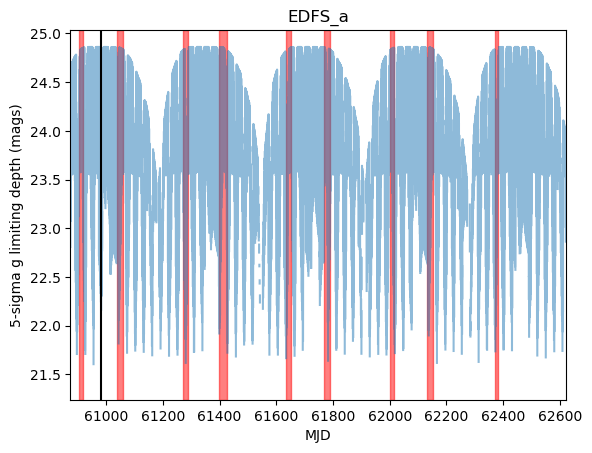

In [37]:
fig, ax = plt.subplots()

ax.plot(ddf_grid['mjd'], ddf_grid[ddf_name+'_m5_g'], alpha=0.5)
ax.set_title(ddf_name)
ax.set_xlabel('MJD')
ax.set_ylabel('5-sigma g limiting depth (mags)')

plt.xlim([np.min(times)-30, SURVEY_START_MJD+365*4.5])
for t in times:
    ax.axvspan(t[0], t[1], alpha=0.5, color="red")

ax.axvline(SURVEY_START_MJD, color='k')

In [38]:
SURVEY_START_MJD

60980.0